# Final Project Submission

Please fill out:
* Student name: Claudia Tsai
* Student pace: self paced 
* Scheduled project review date/time: 11/18 1:30pm
* Instructor name: Joel
* Blog post URL:


# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Goals
1.What is the most profitable genres of films
<br>
2.When to release the film to get most profit
<br>
3.What production budget range is more profitable for movies?

# Importing the libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [75]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Importing datasets 
In this project, I use the following dataset to do analysis.
<br>
1.title.basics.csv
<br>
2.title.ratings.csv
<br>
3.movie_gross
<br>
4.budgets


In [76]:
#Getting basic information of the dataset
title_df = pd.read_csv('data/title.basics.csv')
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [77]:
title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000,"Comedy,Drama,Fantasy"


In [78]:
title_df.duplicated().sum()

0

In [79]:
#Getting basic information of the dataset
rating_df = pd.read_csv('data/title.ratings.csv')
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [80]:
rating_df.duplicated().sum()

0

In [81]:
#Getting basic information of the dataset
movie_gross_df = pd.read_csv('data/bom.movie_gross.csv')
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [82]:
#Getting basic information of the dataset
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [83]:
budgets_df.duplicated().sum()

0

In [84]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Preparation

## Managing budgets dataset

In [85]:
#Renaming column  "movie" to "primary_title",so the budgets_df could be merged with title_df.
budgets_df = budgets_df.rename({'movie':'primary_title'},axis=1)


In [86]:
# Converting the release_date columns type to datetime. 
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'])
budgets_df['release_date'].head()

0   2009-12-18
1   2011-05-20
2   2019-06-07
3   2015-05-01
4   2017-12-15
Name: release_date, dtype: datetime64[ns]

In [87]:
# Created new columns of year and month in order to analyze the data by months or seasons.
budgets_df['release_year'] = budgets_df['release_date'].dt.year
budgets_df['release_month'] = budgets_df['release_date'].dt.month
budgets_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,12


In [88]:
#Converting budget and gross columns datatype from object to float.
budgets_df['production_budget'] = budgets_df['production_budget'].str.replace(',','').str.replace('$','').astype(float)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].str.replace(',','').str.replace('$','').astype(float)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype(float)

In [89]:
#Making sure the converting succesful.
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   primary_title      5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_year       5782 non-null   int64         
 7   release_month      5782 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 361.5+ KB


In [90]:
#Creating columns of domestic ROI & worldwide ROI
budgets_df['domestic_ROI'] = budgets_df.apply(lambda x : ((x['domestic_gross'] - x['production_budget'])/x['production_budget']),axis=1)
budgets_df['worldwide_ROI'] = budgets_df.apply(lambda x : ((x['worldwide_gross'] - x['production_budget'])/x['production_budget']),axis=1)

budgets_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,release_year,release_month,domestic_ROI,worldwide_ROI
0,1,2009-12-18,Avatar,425000000.000,760507625.000,2776345279.000,2009,12,0.789,5.533
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.000,241063875.000,1045663875.000,2011,5,-0.413,1.547
2,3,2019-06-07,Dark Phoenix,350000000.000,42762350.000,149762350.000,2019,6,-0.878,-0.572
3,4,2015-05-01,Avengers: Age of Ultron,330600000.000,459005868.000,1403013963.000,2015,5,0.388,3.244
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.000,620181382.000,1316721747.000,2017,12,0.956,3.154


## Merging title and budgets dataframes

In [91]:
#Merging title & budgets dataframe
genres_budgets_df=title_df.merge(budgets_df)
genres_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             3815 non-null   object        
 1   primary_title      3815 non-null   object        
 2   original_title     3814 non-null   object        
 3   start_year         3815 non-null   int64         
 4   runtime_minutes    3328 non-null   float64       
 5   genres             3743 non-null   object        
 6   id                 3815 non-null   int64         
 7   release_date       3815 non-null   datetime64[ns]
 8   production_budget  3815 non-null   float64       
 9   domestic_gross     3815 non-null   float64       
 10  worldwide_gross    3815 non-null   float64       
 11  release_year       3815 non-null   int64         
 12  release_month      3815 non-null   int64         
 13  domestic_ROI       3815 non-null   float64       
 14  worldwid

In [92]:
#Removing null value in the dataframe
genres_budgets_df= genres_budgets_df.dropna(subset=['original_title','genres','runtime_minutes'])

In [93]:
#Making sure the null values dropped.
genres_budgets_df.isna().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
release_month        0
domestic_ROI         0
worldwide_ROI        0
dtype: int64

In [94]:
#createing a list of genres column
genres_budgets_df['new_genres']=genres_budgets_df['genres'].str.split(',')
genres_budgets_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,domestic_ROI,worldwide_ROI,new_genres
0,tt0249516,Foodfight!,Foodfight!,2012,91.000,"Action,Animation,Comedy",26,2012-12-31,45000000.000,0.000,73706.000,2012,12,-1.000,-0.998,"[Action, Animation, Comedy]"
3,tt3844362,The Overnight,The Overnight,2015,79.000,"Comedy,Mystery",21,2015-06-19,200000.000,1109808.000,1165996.000,2015,6,4.549,4.830,"[Comedy, Mystery]"
4,tt0337692,On the Road,On the Road,2012,124.000,"Adventure,Drama,Romance",17,2013-03-22,25000000.000,720828.000,9313302.000,2013,3,-0.971,-0.627,"[Adventure, Drama, Romance]"
5,tt2404548,On the Road,On the Road,2011,90.000,Drama,17,2013-03-22,25000000.000,720828.000,9313302.000,2013,3,-0.971,-0.627,[Drama]
6,tt3872966,On the Road,On the Road,2013,87.000,Documentary,17,2013-03-22,25000000.000,720828.000,9313302.000,2013,3,-0.971,-0.627,[Documentary]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,tt9275702,Salvador,Salvador,2016,71.000,Drama,38,1986-04-23,4500000.000,1500000.000,1500000.000,1986,4,-0.667,-0.667,[Drama]
3807,tt9313936,Stay Alive,Stay Alive,2019,72.000,Documentary,85,2006-03-24,20000000.000,23086480.000,23187506.000,2006,3,0.154,0.159,[Documentary]
3809,tt9607270,The Blue Bird,The Blue Bird,2015,84.000,Drama,71,1976-01-01,1200000.000,887000.000,887000.000,1976,1,-0.261,-0.261,[Drama]
3812,tt9805168,Traitor,Traitor,2015,110.000,"Action,Drama,Romance",25,2008-08-27,22000000.000,23530831.000,27882226.000,2008,8,0.070,0.267,"[Action, Drama, Romance]"


In [95]:
#Exploding column "new_genres"
genres_df=genres_budgets_df.explode('new_genres')
genres_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,domestic_ROI,worldwide_ROI,new_genres
0,tt0249516,Foodfight!,Foodfight!,2012,91.000,"Action,Animation,Comedy",26,2012-12-31,45000000.000,0.000,73706.000,2012,12,-1.000,-0.998,Action
0,tt0249516,Foodfight!,Foodfight!,2012,91.000,"Action,Animation,Comedy",26,2012-12-31,45000000.000,0.000,73706.000,2012,12,-1.000,-0.998,Animation
0,tt0249516,Foodfight!,Foodfight!,2012,91.000,"Action,Animation,Comedy",26,2012-12-31,45000000.000,0.000,73706.000,2012,12,-1.000,-0.998,Comedy
3,tt3844362,The Overnight,The Overnight,2015,79.000,"Comedy,Mystery",21,2015-06-19,200000.000,1109808.000,1165996.000,2015,6,4.549,4.830,Comedy
3,tt3844362,The Overnight,The Overnight,2015,79.000,"Comedy,Mystery",21,2015-06-19,200000.000,1109808.000,1165996.000,2015,6,4.549,4.830,Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,tt9607270,The Blue Bird,The Blue Bird,2015,84.000,Drama,71,1976-01-01,1200000.000,887000.000,887000.000,1976,1,-0.261,-0.261,Drama
3812,tt9805168,Traitor,Traitor,2015,110.000,"Action,Drama,Romance",25,2008-08-27,22000000.000,23530831.000,27882226.000,2008,8,0.070,0.267,Action
3812,tt9805168,Traitor,Traitor,2015,110.000,"Action,Drama,Romance",25,2008-08-27,22000000.000,23530831.000,27882226.000,2008,8,0.070,0.267,Drama
3812,tt9805168,Traitor,Traitor,2015,110.000,"Action,Drama,Romance",25,2008-08-27,22000000.000,23530831.000,27882226.000,2008,8,0.070,0.267,Romance


In [96]:
#deleting columns not in use for analyzing
genres_df.drop(['id','start_year'],axis=1,inplace=True)

In [97]:
#Creating a new column to sort the movies in seasons
genres_df['Seasons'] = genres_df['release_month'].apply(lambda x : 'Summer' if x > 5 and x < 9
                                                     else ('Spring' if x >= 3 and x < 6
                                                     else('Winter' if x >11 or x < 3
                                                     else('Fall'))))


In [98]:
genres_df.tail()

,tconst,primary_title,original_title,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,domestic_ROI,worldwide_ROI,new_genres,Seasons
3809,tt9607270,The Blue Bird,The Blue Bird,84.000,Drama,1976-01-01,1200000.000,887000.000,887000.000,1976,1,-0.261,-0.261,Drama,Winter
3812,tt9805168,Traitor,Traitor,110.000,"Action,Drama,Romance",2008-08-27,22000000.000,23530831.000,27882226.000,2008,8,0.070,0.267,Action,Summer
3812,tt9805168,Traitor,Traitor,110.000,"Action,Drama,Romance",2008-08-27,22000000.000,23530831.000,27882226.000,2008,8,0.070,0.267,Drama,Summer
3812,tt9805168,Traitor,Traitor,110.000,"Action,Drama,Romance",2008-08-27,22000000.000,23530831.000,27882226.000,2008,8,0.070,0.267,Romance,Summer
3813,tt9844102,Ray,Ray,111.000,Crime,2004-10-29,40000000.000,75305995.000,124823094.000,2004,10,0.883,2.121,Crime,Fall


## Merging title & rating dataframe

In [99]:
#Merging title & rating dataframe
title_joined_df=title_df.merge(rating_df)
title_joined_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000,"Action,Crime,Drama",7.000,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000,"Biography,Drama",7.200,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000,Drama,6.900,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.100,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000,"Comedy,Drama,Fantasy",6.500,119


In [100]:
title_joined_df['genres'].str.split(',')

0          [Action, Crime, Drama]
1              [Biography, Drama]
2                         [Drama]
3                 [Comedy, Drama]
4        [Comedy, Drama, Fantasy]
                   ...           
73851               [Documentary]
73852             [Drama, Family]
73853               [Documentary]
73854                         NaN
73855               [Documentary]
Name: genres, Length: 73856, dtype: object

In [101]:
#Creating a new column for genres
title_joined_df['new_genres']=title_joined_df['genres'].str.split(',')
title_joined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,new_genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000,"Action,Crime,Drama",7.000,77,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000,"Biography,Drama",7.200,43,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000,Drama,6.900,4517,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.100,13,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000,"Comedy,Drama,Fantasy",6.500,119,"[Comedy, Drama, Fantasy]"
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.000,Documentary,6.200,6,[Documentary]
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.000,"Drama,Family",8.700,136,"[Drama, Family]"
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.500,8,[Documentary]
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.600,5,NaN


## Format large tick values

In [102]:
from matplotlib.ticker import FuncFormatter

In [103]:
def millions(tick_val,pos):
    """adapted from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html"""
    val = round(tick_val/1000000, 1)
    new_tick_format = '${:.0f}M'.format(val)
    return new_tick_format
form = FuncFormatter(millions)

In [104]:
#Idea of billions function is from above
def billions(tick_val,pos):
    val = round(tick_val/1000000000,1)
    new_tick_format = f'${(val):.2f} B'
    return new_tick_format
form_b=FuncFormatter(billions)

# Data Analysis

## Domestic & Worldwide ROI by Month 

### Domestic ROI by Month

In [105]:
plot_genres = genres_df.groupby('release_month')['domestic_ROI'].mean()
max(plot_genres.values)

2.1385281776872485

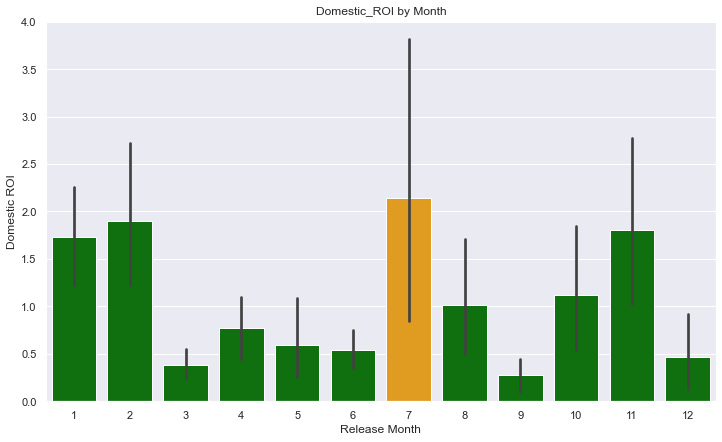

In [106]:
"""highlighted the max value for the bar
https://stackoverflow.com/questions/31074758/how-to-set-a-different-color-to-the-largest-bar-in-a-seaborn-barplot"""
sns.set(rc={'figure.figsize':(12,7)})
plot_genres = genres_df.groupby('release_month')['domestic_ROI'].mean()
clrs=['green' if (value < max(plot_genres.values)) else 'orange' for value in plot_genres.values]
ax_d=sns.barplot(data=genres_df,x='release_month',y='domestic_ROI',palette=clrs)
ax_d.set_xlabel('Release Month')
ax_d.set_ylabel('Domestic ROI')
ax_d.set_title('Domestic_ROI by Month');
#ax_d.set_xticklabels(ax_w.get_xticklabels());

### Worldwide ROI by Month

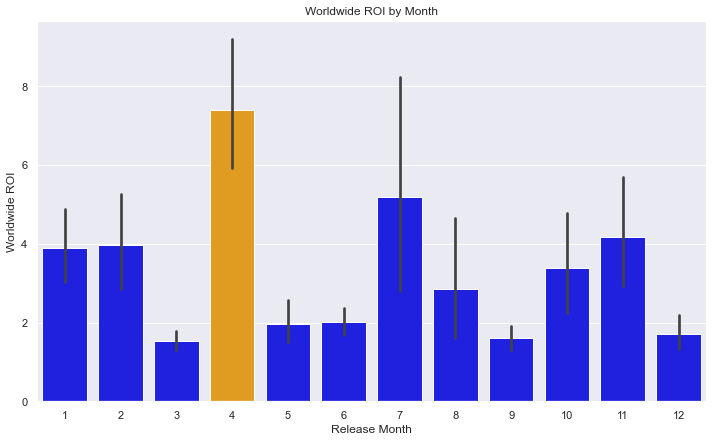

In [107]:
# Finding out worldwide_ROI in released month
sns.set(rc={'figure.figsize':(12,7)})
plot_genres = genres_df.groupby('release_month')['worldwide_ROI'].mean()
clrs=['blue' if (value < max(plot_genres.values)) else 'orange' for value in plot_genres.values]
ax_w=sns.barplot(data=genres_df,x='release_month',y='worldwide_ROI',palette=clrs)
ax_w.set_xlabel('Release Month')
ax_w.set_ylabel('Worldwide ROI')
ax_w.set_title('Worldwide ROI by Month')
ax_w.set_xticklabels(ax_w.get_xticklabels());

## Domestic and Worldwide ROI by Season

### Domestic ROI by Season

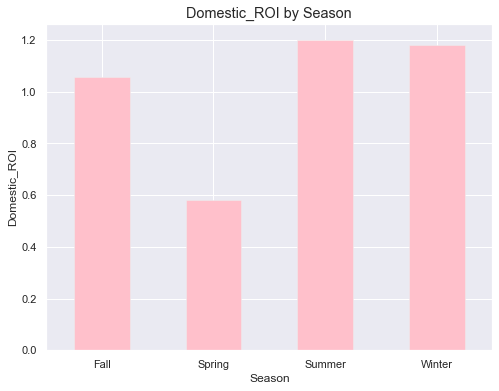

In [108]:
fig,ax=plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
genres_df.groupby('Seasons')['domestic_ROI'].mean().plot(kind='bar',color='pink')
ax.set_ylabel('Domestic_ROI')
ax.set_xlabel('Season')
ax.set_title('Domestic_ROI by Season')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

In [109]:
plot_d_genres= genres_df.groupby('Seasons')['domestic_ROI'].mean()

plot_d_genres

Seasons
Fall     1.056
Spring   0.581
Summer   1.201
Winter   1.182
Name: domestic_ROI, dtype: float64

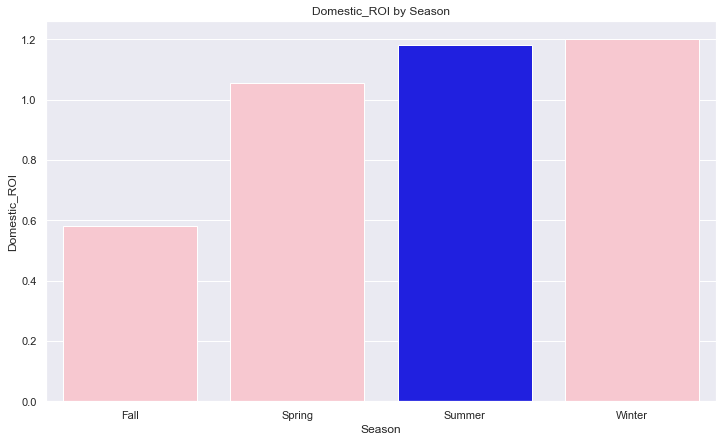

In [110]:
# Finding out domestic_ROI in different seasons
sns.set(rc={'figure.figsize':(12,7)})
plot_d_genres= genres_df.groupby('Seasons')['domestic_ROI'].mean()
clrs=['pink' if (x < max(plot_d_genres.values)) else 'blue' for x in plot_d_genres.values]
ax_d=sns.barplot
ax_d=sns.barplot(data=plot_d_genres,x=plot_d_genres.index,y=plot_d_genres.values,palette=clrs)
ax_d.set_ylabel('Domestic_ROI')
ax_d.set_xlabel('Season')
ax_d.set_title('Domestic_ROI by Season')
ax_d.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

### Worldwide ROI by Season

In [111]:
plot_w_genres= genres_df.groupby('Seasons')['worldwide_ROI'].mean()
max(plot_w_genres.values)

3.7818455672845372

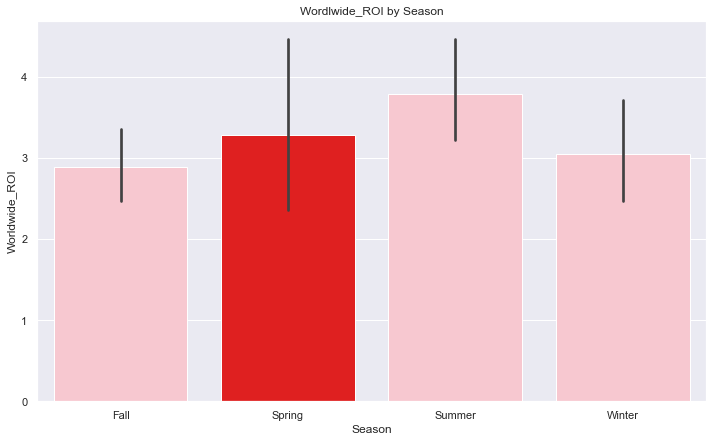

In [112]:
# Finding out worldwide_ROI by season
sns.set(rc={'figure.figsize':(12,7)})
plot_w_genres= genres_df.groupby('Seasons')['worldwide_ROI'].mean()
clrs=['pink' if (value < max(plot_w_genres.values)) else 'red' for value in plot_w_genres.values]
ax_w=sns.barplot(data=genres_df,x='Seasons',y='worldwide_ROI',palette=clrs)
ax_w.set_ylabel('Worldwide_ROI')
ax_w.set_xlabel('Season')
ax_w.set_title('Wordlwide_ROI by Season')
ax_w.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

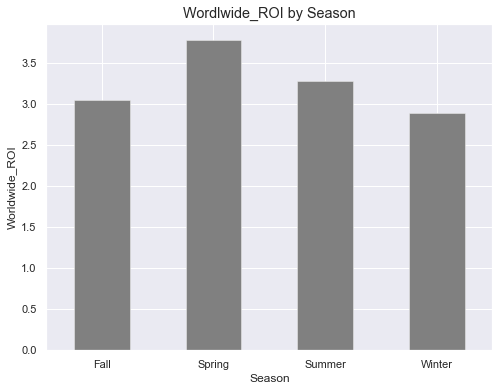

In [113]:
fig,ax=plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
genres_df.groupby('Seasons')['worldwide_ROI'].mean().plot(kind='bar',color='grey')

ax.set_ylabel('Worldwide_ROI')
ax.set_xlabel('Season')
ax.set_title('Wordlwide_ROI by Season')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

## Production Budget

###  Production Budget Fast Fact

In [114]:
genres_df['production_budget'].describe()

count        7204.000
mean     37141666.489
std      49865464.666
min          1400.000
25%       5000000.000
50%      18000000.000
75%      45000000.000
max     425000000.000
Name: production_budget, dtype: float64

### Relations between Production Budget and Worldwide Gross

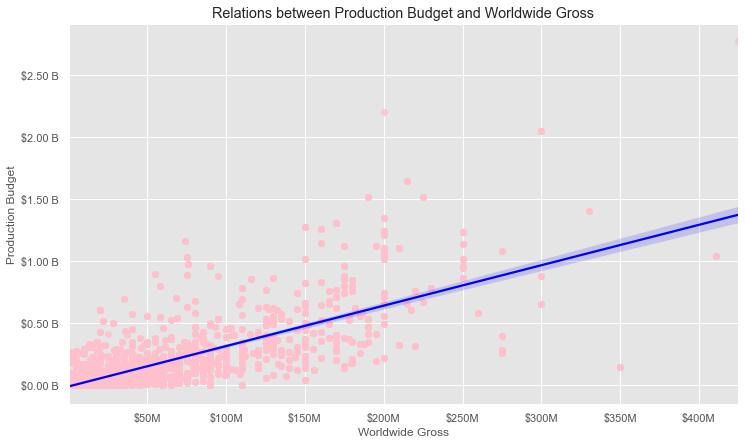

In [175]:
#Knowing the relation between production_budget and worldwide_gross
ax_b=sns.regplot(data=genres_df,x='production_budget',y='worldwide_gross',scatter_kws={'color':'pink'},line_kws={'color':'blue'})
plt.ticklabel_format(style='plain', axis='y')
ax_b.set_ylabel('Production Budget')
ax_b.set_xlabel('Worldwide Gross')
ax_b.set_title('Relations between Production Budget and Worldwide Gross')
ax_b.xaxis.set_major_formatter(form)
ax_b.yaxis.set_major_formatter(form_b)

### Visualization of Production Budget Distribution

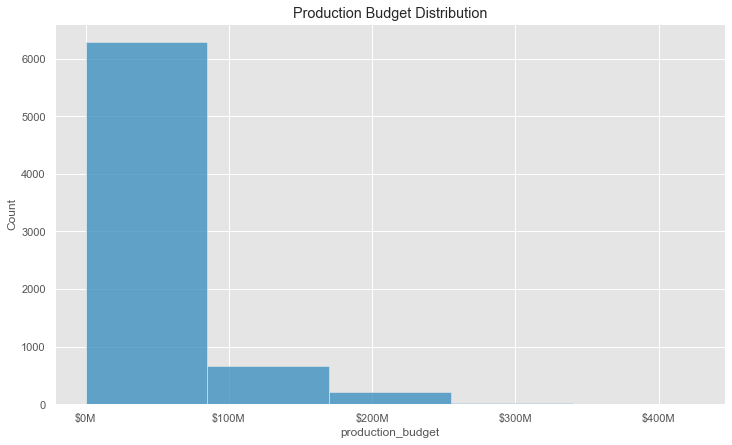

In [116]:
ax_b=sns.histplot(data=genres_df,x='production_budget',bins=5)
plt.ticklabel_format(style='plain', axis='y')
#ax_b.xaxis.set_major_formatter('${x:,.0f}')
ax_b.set_title('Production Budget Distribution')
ax_b.xaxis.set_major_formatter(form)

### Production Budget greater than $100,000,000

In [117]:
#Creating a high_budget column for production budget greater than $100,000,000
genres_df['high_budget']=genres_df['production_budget']>=100_000_000
genres_df

,tconst,primary_title,original_title,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,domestic_ROI,worldwide_ROI,new_genres,Seasons,high_budget
0,tt0249516,Foodfight!,Foodfight!,91.000,"Action,Animation,Comedy",2012-12-31,45000000.000,0.000,73706.000,2012,12,-1.000,-0.998,Action,Winter,False
0,tt0249516,Foodfight!,Foodfight!,91.000,"Action,Animation,Comedy",2012-12-31,45000000.000,0.000,73706.000,2012,12,-1.000,-0.998,Animation,Winter,False
0,tt0249516,Foodfight!,Foodfight!,91.000,"Action,Animation,Comedy",2012-12-31,45000000.000,0.000,73706.000,2012,12,-1.000,-0.998,Comedy,Winter,False
3,tt3844362,The Overnight,The Overnight,79.000,"Comedy,Mystery",2015-06-19,200000.000,1109808.000,1165996.000,2015,6,4.549,4.830,Comedy,Summer,False
3,tt3844362,The Overnight,The Overnight,79.000,"Comedy,Mystery",2015-06-19,200000.000,1109808.000,1165996.000,2015,6,4.549,4.830,Mystery,Summer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,tt9607270,The Blue Bird,The Blue Bird,84.000,Drama,1976-01-01,1200000.000,887000.000,887000.000,1976,1,-0.261,-0.261,Drama,Winter,False
3812,tt9805168,Traitor,Traitor,110.000,"Action,Drama,Romance",2008-08-27,22000000.000,23530831.000,27882226.000,2008,8,0.070,0.267,Action,Summer,False
3812,tt9805168,Traitor,Traitor,110.000,"Action,Drama,Romance",2008-08-27,22000000.000,23530831.000,27882226.000,2008,8,0.070,0.267,Drama,Summer,False
3812,tt9805168,Traitor,Traitor,110.000,"Action,Drama,Romance",2008-08-27,22000000.000,23530831.000,27882226.000,2008,8,0.070,0.267,Romance,Summer,False


In [118]:
genres_mean=genres_df.groupby('new_genres').mean()['worldwide_ROI'].sort_values(ascending=False)
genres_mean.index[:10]

Index(['Musical', 'Horror', 'Mystery', 'Family', 'Animation', 'Documentary',
       'Thriller', 'Biography', 'Fantasy', 'Music'],
      dtype='object', name='new_genres')

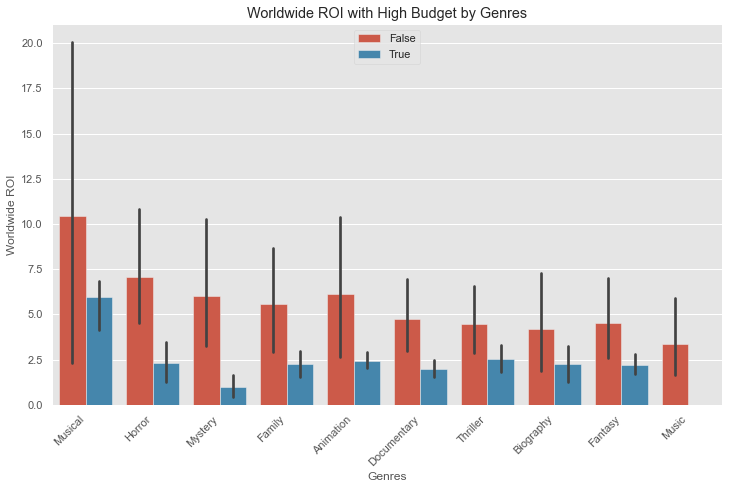

In [158]:
#creating a barplot to analyze high production budgets and genres,limit to top 10 genres
ax=sns.barplot(data=genres_df,order= genres_mean.index[:10],x='new_genres',y='worldwide_ROI',hue='high_budget')
ax.set_xlabel('Genres')
ax.set_ylabel('Worldwide ROI')
ax.set_title('Worldwide ROI with High Budget by Genres')
ax.legend()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right");

## Gross and ROI by Genre

### The Movie with the Highest Worldwide ROI 

In [120]:
highest_ROI=genres_df[genres_df['worldwide_ROI']==genres_df['worldwide_ROI'].max()]
highest_ROI

,tconst,primary_title,original_title,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,domestic_ROI,worldwide_ROI,new_genres,Seasons,high_budget
2607,tt2309260,The Gallows,The Gallows,81.000,"Horror,Mystery,Thriller",2015-07-10,100000.000,22764410.000,41656474.000,2015,7,226.644,415.565,Horror,Summer,False
2607,tt2309260,The Gallows,The Gallows,81.000,"Horror,Mystery,Thriller",2015-07-10,100000.000,22764410.000,41656474.000,2015,7,226.644,415.565,Mystery,Summer,False
2607,tt2309260,The Gallows,The Gallows,81.000,"Horror,Mystery,Thriller",2015-07-10,100000.000,22764410.000,41656474.000,2015,7,226.644,415.565,Thriller,Summer,False


### Top 10 Worldwide ROI by Genres

In [121]:
worldwide_ROI_mean_df=genres_df.groupby('new_genres').mean()['worldwide_ROI'].sort_values(ascending= False)
worldwide_ROI_mean_df.index

Index(['Musical', 'Horror', 'Mystery', 'Family', 'Animation', 'Documentary',
       'Thriller', 'Biography', 'Fantasy', 'Music', 'Sport', 'History',
       'Romance', 'Drama', 'Comedy', 'Sci-Fi', 'Adventure', 'Action', 'Crime',
       'War', 'News', 'Western', 'Reality-TV'],
      dtype='object', name='new_genres')

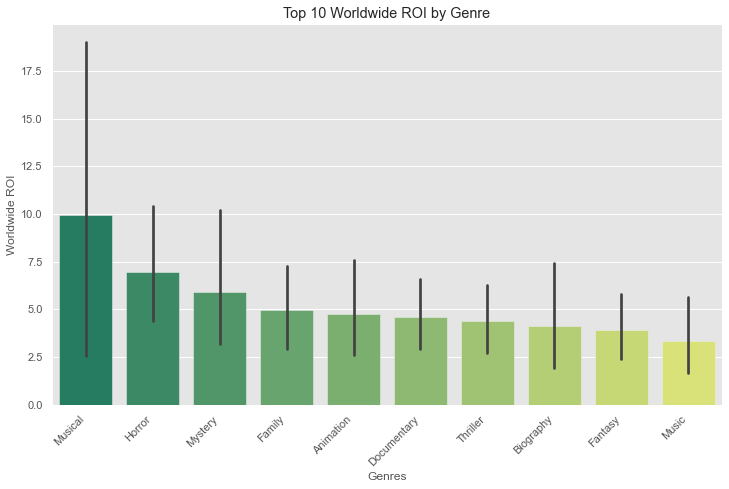

In [122]:
ax=sns.barplot(data=genres_df,order= worldwide_ROI_mean_df.index[:10],x='new_genres',y='worldwide_ROI',palette='summer')
ax.set_xlabel('Genres')
ax.set_ylabel('Worldwide ROI')
ax.set_title('Top 10 Worldwide ROI by Genre')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right");

### Top 10 Domestic ROI by Genres

In [123]:
domestic_ROI_mean_df=genres_df.groupby('new_genres').mean()['domestic_ROI'].sort_values(ascending=False)
domestic_ROI_mean_df.index[:-1]

Index(['Musical', 'Horror', 'Mystery', 'Family', 'Sport', 'Thriller',
       'Animation', 'Fantasy', 'Biography', 'Music', 'History', 'Romance',
       'Comedy', 'Documentary', 'Drama', 'Sci-Fi', 'Action', 'Crime',
       'Adventure', 'Western', 'War', 'News'],
      dtype='object', name='new_genres')

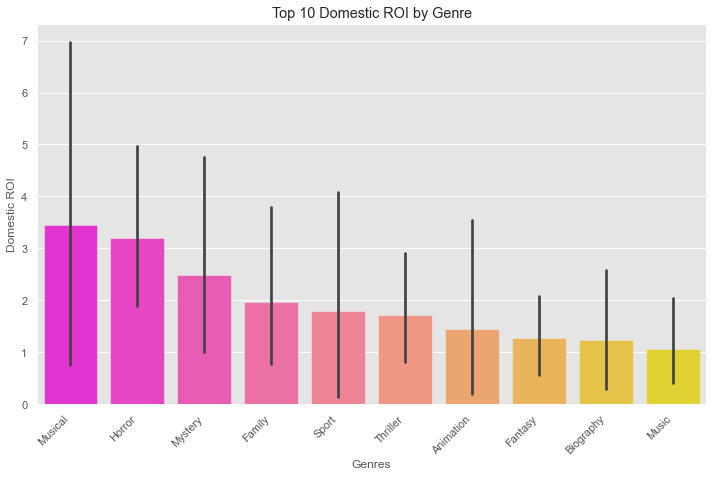

In [124]:
ax=sns.barplot(data=genres_df,order= domestic_ROI_mean_df.index[:10],x='new_genres',y='domestic_ROI',palette='spring')
ax.set_xlabel('Genres')
ax.set_ylabel('Domestic ROI')
ax.set_title('Top 10 Domestic ROI by Genre')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right");

### Genres by Domestic Gross 

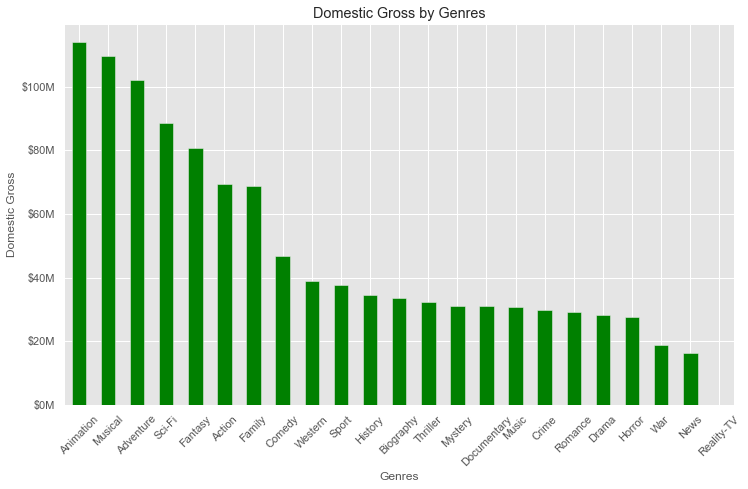

In [133]:
domestic_gross_df=genres_df.groupby('new_genres').mean()['domestic_gross'].sort_values(ascending=False)
ax=domestic_gross_df.plot(kind='bar',color='green')
ax.set_ylabel('Domestic Gross')
ax.set_xlabel('Genres')
ax.set_title('Domestic Gross by Genres')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.yaxis.set_major_formatter(form)
plt.show()

### Genres by Worldwide Gross

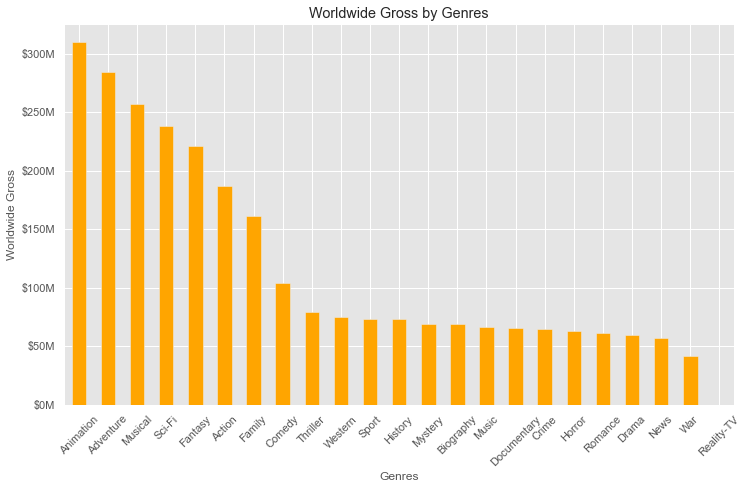

In [134]:
world_gross_df=genres_df.groupby('new_genres').mean()['worldwide_gross'].sort_values(ascending=False)
ax=world_gross_df.plot(kind='bar',color='orange')
ax.set_ylabel('Worldwide Gross')
ax.set_xlabel('Genres')
ax.set_title('Worldwide Gross by Genres')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.yaxis.set_major_formatter(form)
plt.show()

### Domestic ROI by Genre in Summer

In [127]:
#Domestic ROI in Summer by Genre
summer= genres_df.loc[genres_df['Seasons']=='Summer',['domestic_ROI','new_genres']]
summer_genres=summer.groupby('new_genres').mean()['domestic_ROI'].sort_values(ascending=False)

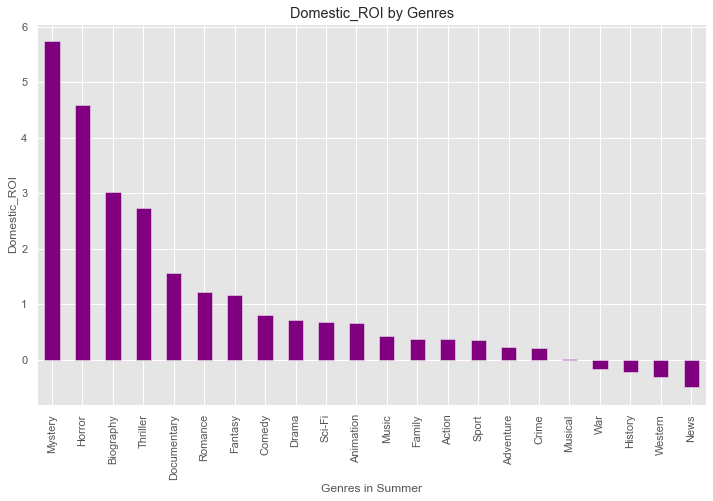

In [128]:
ax=summer_genres.plot(kind='bar',color='purple')
ax.set_ylabel('Domestic_ROI')
ax.set_xlabel('Genres in Summer')
ax.set_title('Domestic_ROI by Genres')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

### Top 10 Average Domestic ROI by Genre in Summer

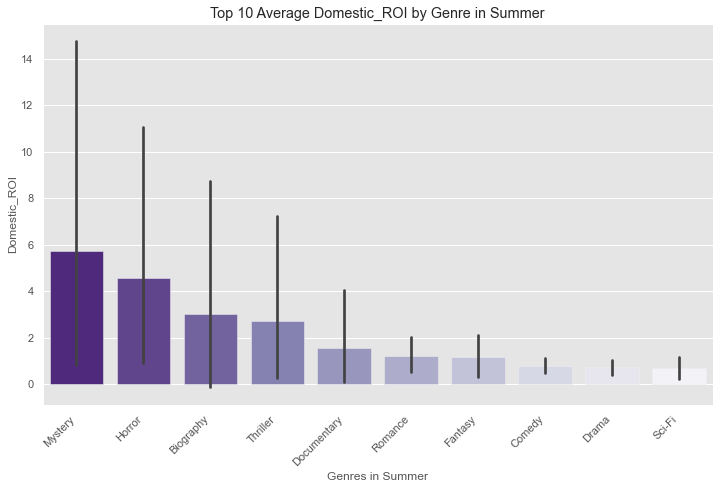

In [129]:
ax=sns.barplot(data=summer,order= summer_genres.index[:10],x='new_genres',y='domestic_ROI',palette='Purples_r')
ax.set_ylabel('Domestic_ROI')
ax.set_xlabel('Genres in Summer')
ax.set_title('Top 10 Average Domestic_ROI by Genre in Summer')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right");

In [160]:
#Worldwide ROI in Spring by Genre
spring= genres_df.loc[genres_df['Seasons']=='Spring',['worldwide_ROI','new_genres']]
spring_genres=spring.groupby('new_genres').mean()['worldwide_ROI'].sort_values(ascending=False)

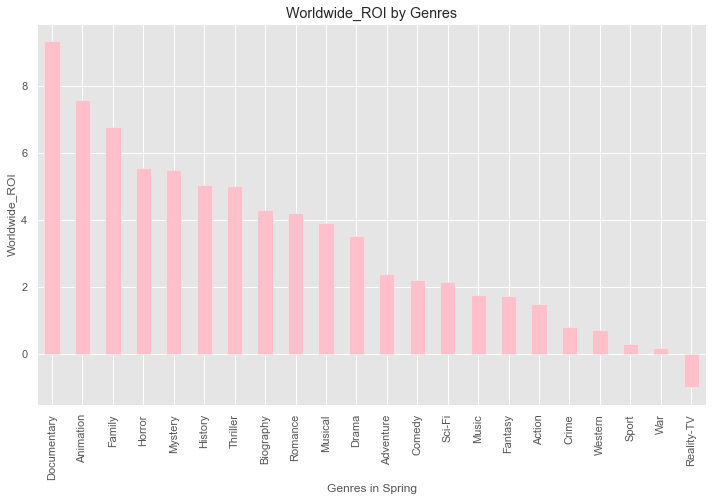

In [161]:
ax=spring_genres.plot(kind='bar',color='pink')
ax.set_ylabel('Worldwide_ROI')
ax.set_xlabel('Genres in Spring')
ax.set_title('Worldwide_ROI by Genres')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

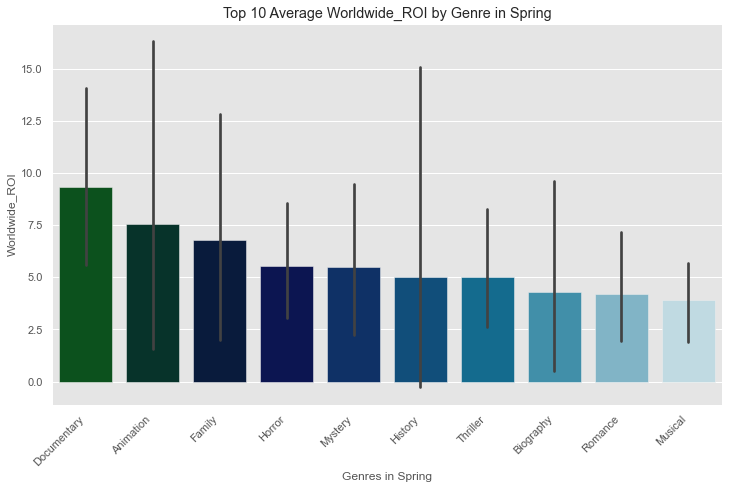

In [173]:
ax=sns.barplot(data=spring,order= spring_genres.index[:10],x='new_genres',y='worldwide_ROI',palette='ocean')
ax.set_ylabel('Worldwide_ROI')
ax.set_xlabel('Genres in Spring')
ax.set_title('Top 10 Average Worldwide_ROI by Genre in Spring')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right");

### Domestic Gross by Genres in Summer

In [130]:
#Domestic Gross by Genres in Summer
summer_g= genres_df.loc[genres_df['Seasons']=='Summer',['domestic_gross','new_genres']]
summer_g_genres=summer_g.groupby('new_genres').mean()['domestic_gross'].sort_values(ascending=False)

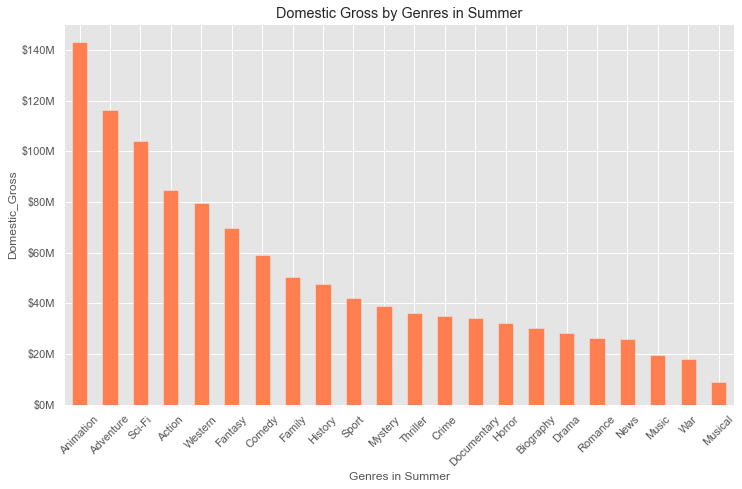

In [135]:
ax=summer_g_genres.plot(kind='bar',color='coral')
ax.set_ylabel('Domestic_Gross')
ax.set_xlabel('Genres in Summer')
ax.set_title('Domestic Gross by Genres in Summer')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.yaxis.set_major_formatter(form)
plt.show()

### Top 10 Average Domestic Gross by Genre in Summer

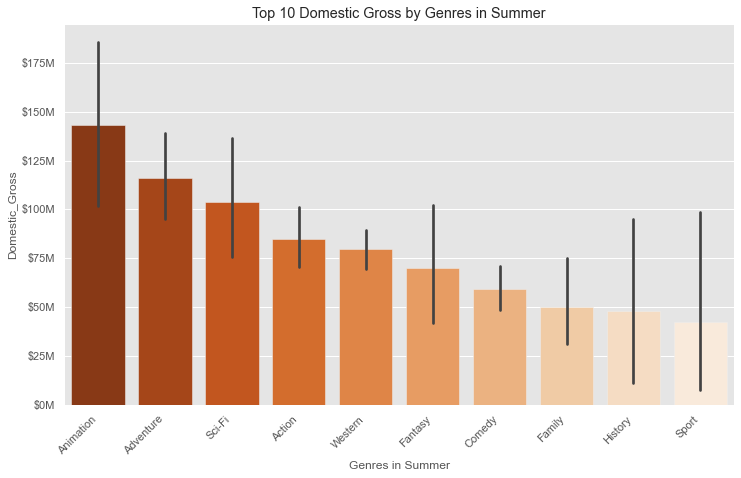

In [132]:
ax=sns.barplot(data=summer_g,order= summer_g_genres.index[:10],x='new_genres',y='domestic_gross',palette='Oranges_r')
ax.set_ylabel('Domestic_Gross')
ax.set_xlabel('Genres in Summer')
ax.set_title('Top 10 Domestic Gross by Genres in Summer')
ax.yaxis.set_major_formatter(form)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right");

### Worldwide Gross by Genres in Spring

In [138]:
spring_g= genres_df.loc[genres_df['Seasons']=='Spring',['worldwide_gross','new_genres']]
spring_g_genres=spring_g.groupby('new_genres').mean()['worldwide_gross'].sort_values(ascending=False)


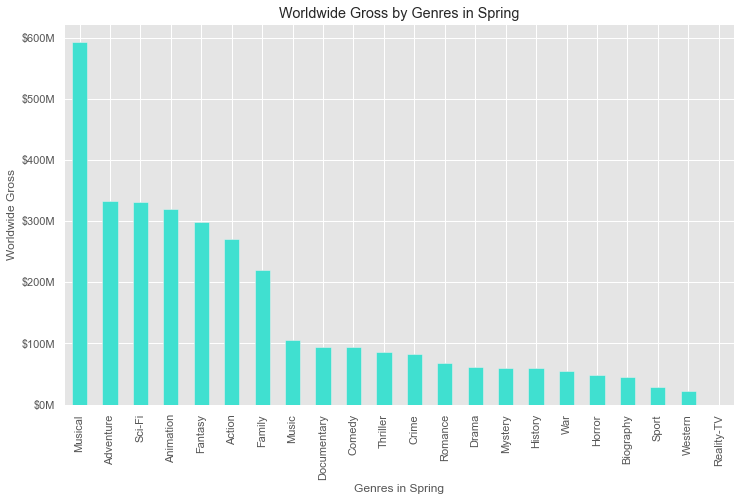

In [146]:
ax=spring_g_genres.plot(kind='bar',color='turquoise')
ax.set_ylabel('Worldwide Gross')
ax.set_xlabel('Genres in Spring')
ax.set_title('Worldwide Gross by Genres in Spring')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.yaxis.set_major_formatter(form)
plt.show()

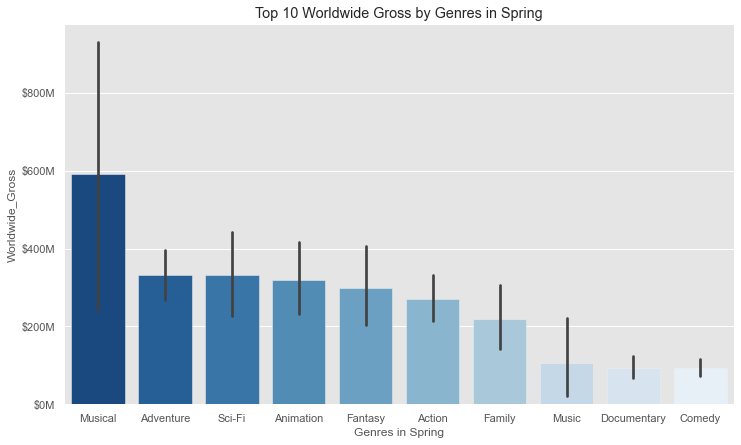

In [144]:
ax_d=sns.barplot(data=spring_g,order= spring_g_genres.index[:10],x='new_genres',y='worldwide_gross',palette='Blues_r')
ax_d.set_ylabel('Worldwide_Gross')
ax_d.set_xlabel('Genres in Spring')
ax_d.set_title('Top 10 Worldwide Gross by Genres in Spring')
ax_d.yaxis.set_major_formatter(form)

### Worldwide Gross by Genres in Summer

In [147]:
summer_g= genres_df.loc[genres_df['Seasons']=='Summer',['worldwide_gross','new_genres']]
summer_g_genres=summer_g.groupby('new_genres').mean()['worldwide_gross'].sort_values(ascending=False)

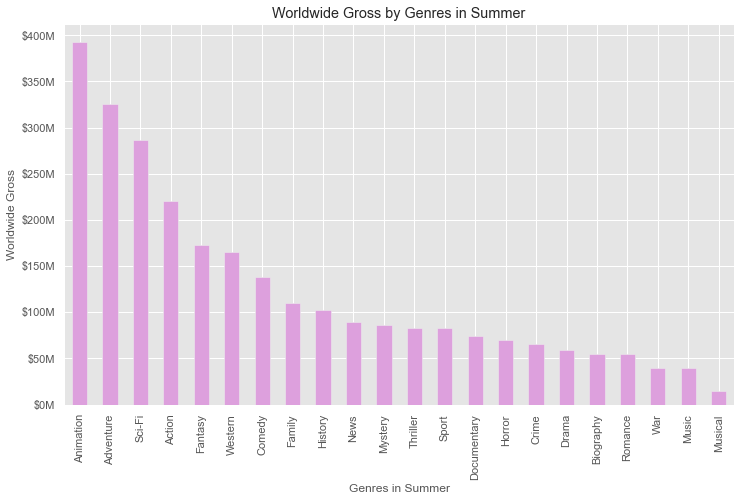

In [149]:
ax=summer_g_genres.plot(kind='bar',color='plum')
ax.set_ylabel('Worldwide Gross')
ax.set_xlabel('Genres in Summer')
ax.set_title('Worldwide Gross by Genres in Summer')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.yaxis.set_major_formatter(form)
plt.show()

### Top 10 Worldwide Gross by Genres in Summer

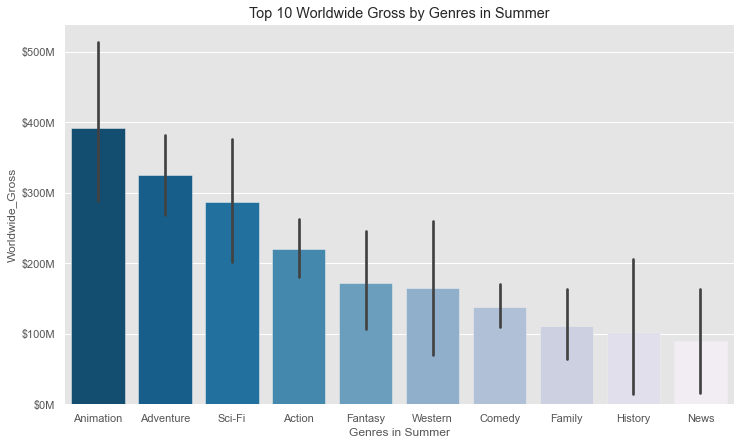

In [157]:
ax_d=sns.barplot(data=summer_g,order= summer_g_genres.index[:10],x='new_genres',y='worldwide_gross',palette='PuBu_r')
ax_d.set_ylabel('Worldwide_Gross')
ax_d.set_xlabel('Genres in Summer')
ax_d.set_title('Top 10 Worldwide Gross by Genres in Summer')
ax_d.yaxis.set_major_formatter(form)
#ax_d.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right");